In [83]:
!unzip archive\ \(1\).zip

Archive:  archive (1).zip
replace imdb_top_1000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [84]:
import pandas as pd

imdb = pd.read_csv('imdb_top_1000.csv')
imdb.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

In [85]:
imdb['Certificate'] = imdb['Certificate'].fillna('Unknown')

In [86]:
imdb['Meta_score'] = imdb['Meta_score'].fillna(imdb['Meta_score'].mean())

In [87]:
imdb['Released_Year'] = imdb['Released_Year'].replace({'PG': '1995'})


In [72]:
imdb['Released_Year'] = imdb['Released_Year'].astype(int)

In [96]:
imdb['Gross'] = imdb['Gross'].replace({',': ''}, regex=True)
imdb['Gross'] = pd.to_numeric(imdb['Gross'], errors='coerce')
imdb['Gross'] = imdb['Gross'].fillna(0).astype(int)


In [99]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


In [102]:
imdb['Released_Year'] = pd.to_numeric(imdb['Released_Year'], errors='coerce')

In [103]:
imdb['Decade'] = (imdb['Released_Year']//10)*10

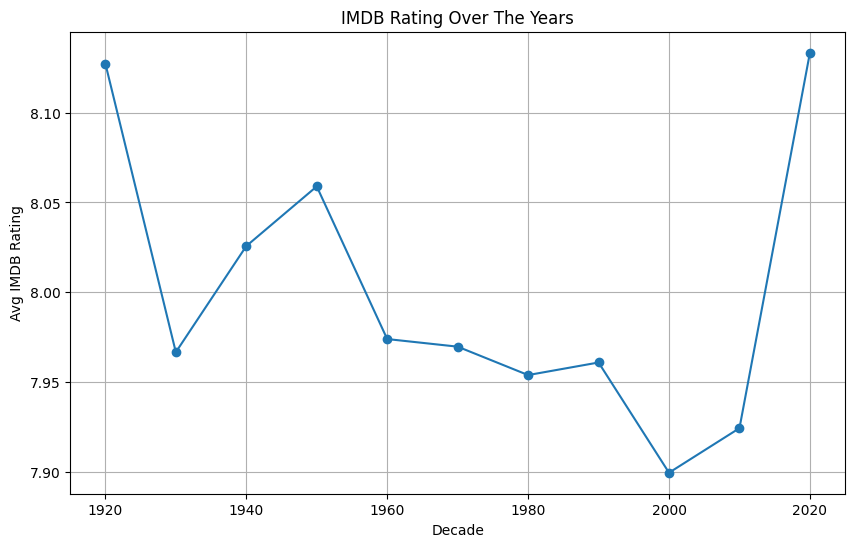

In [104]:
import matplotlib.pyplot as plt
avg_score = imdb.groupby('Decade')['IMDB_Rating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_score.index, avg_score.values, marker='o', linestyle='-')
plt.grid(True)
plt.title('IMDB Rating Over The Years')
plt.xlabel('Decade')
plt.ylabel('Avg IMDB Rating')
plt.show()

In [105]:
imdb['Main_genre'] = imdb['Genre'].str.split(',').str[0]

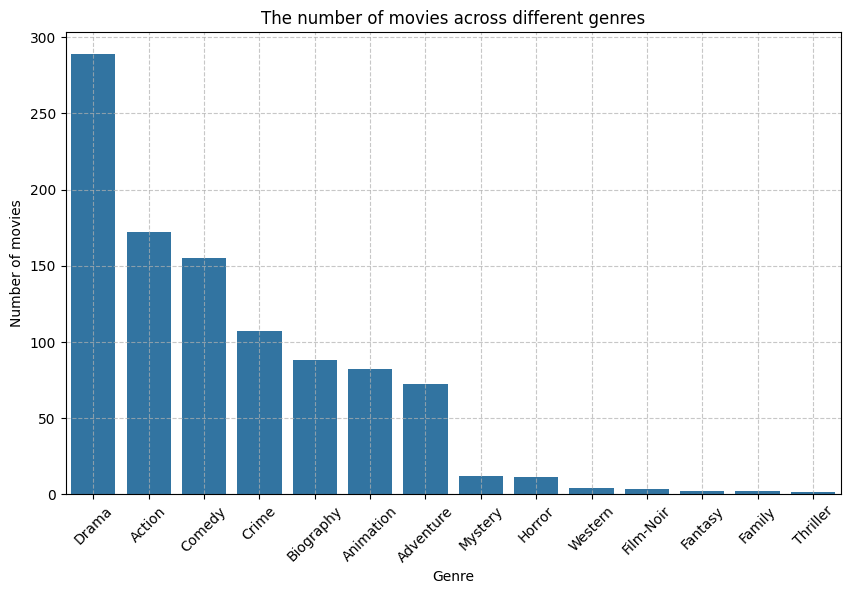

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
genre_counts = imdb['Main_genre'].str.split(', ').explode().value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('The number of movies across different genres')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Number of movies')
plt.show()

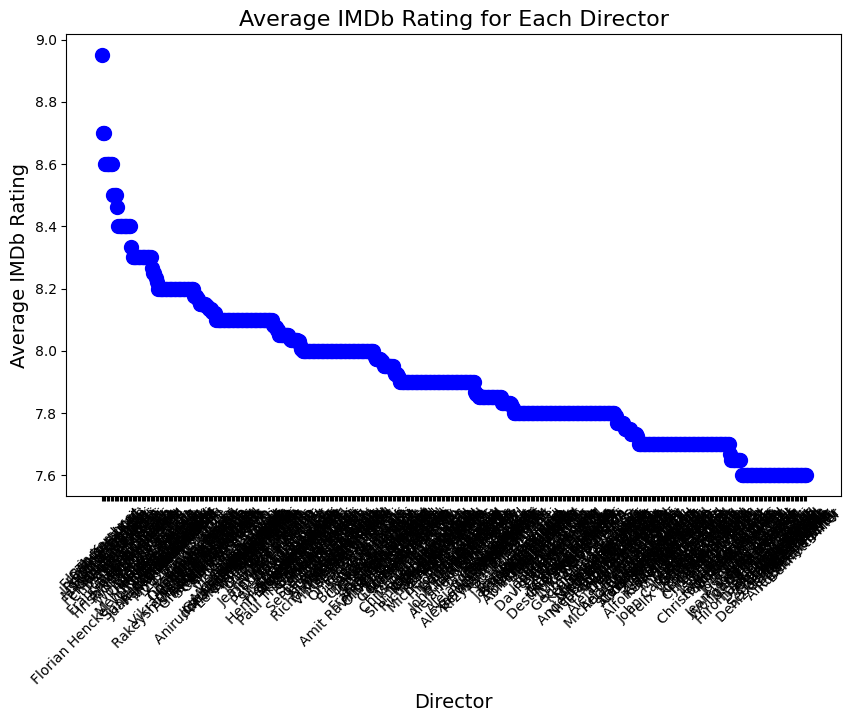

In [107]:
import matplotlib.pyplot as plt
import numpy as np

director_ratings = imdb.groupby('Director')['IMDB_Rating'].mean().reset_index()
director_avg_ratings = director_ratings.sort_values(by='IMDB_Rating', ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(director_avg_ratings['Director'], director_avg_ratings['IMDB_Rating'], color='blue', s=100)
plt.xticks(rotation=45)
plt.title('Average IMDb Rating for Each Director', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Average IMDb Rating', fontsize=14)

plt.show()


In [108]:
imdb['Gross'] = pd.to_numeric(imdb['Gross'], errors='coerce')

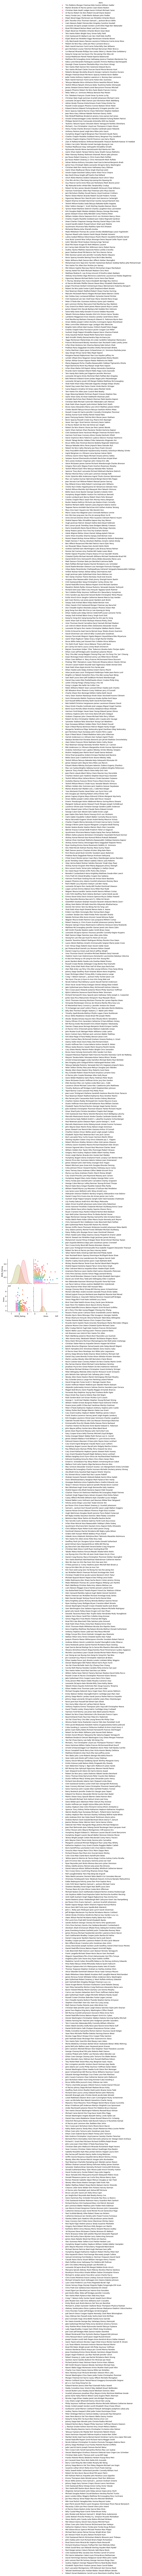

In [109]:
import seaborn as sns

imdb['stars'] = imdb[['Star1', 'Star2', 'Star3', 'Star4']].agg('-'.join, axis=1)
sns.pairplot(imdb, vars=['IMDB_Rating', 'Gross'], hue='stars')
plt.show()

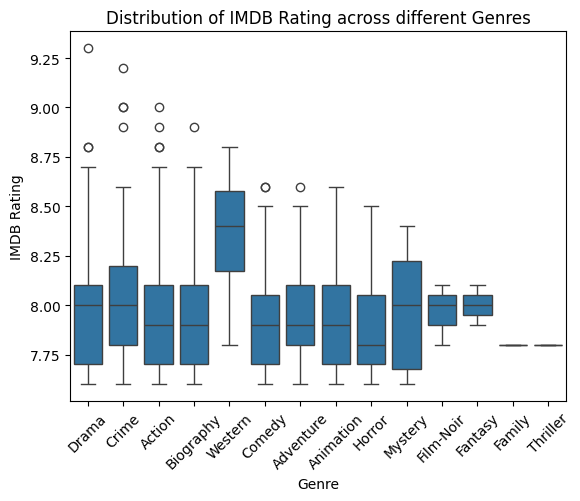

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Main_genre', y='IMDB_Rating', data=imdb)
plt.xticks(rotation=45)
plt.title('Distribution of IMDB Rating across different Genres')
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.show()

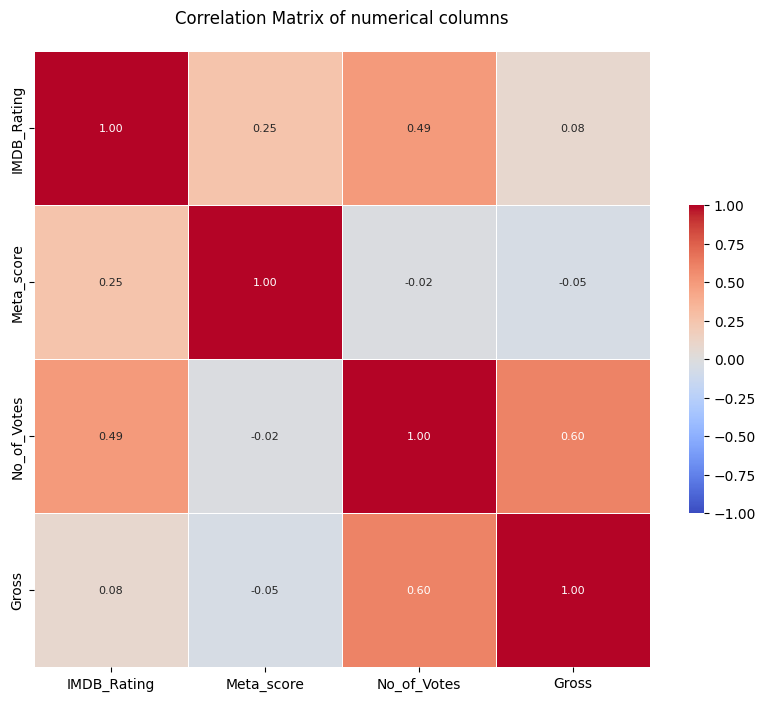

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

imdb['Gross'] = imdb['Gross'].astype(int)

correlation_matrix = imdb[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            center=0,
            square=True,
            fmt='.2f',
            annot_kws={"size": 8},
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            linewidths=0.5,
            cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of numerical columns', pad=20)
plt.show()